In [ ]:
import numpy as np
import numpy.linalg as npln
import scipy.linalg as ln
import matplotlib.pyplot as plt
import math

: 

In [ ]:
# part of question 3
# computes the matrix vector product of a lower triangualr matrix with only 1 along the main diagonal without
# performing any multiplications by 1 or zero

x = np.array([1,2,3])
A = np.array([[1,0,0], [2,1,0], [3,1,1]])

b = np.zeros(x.shape)


for i in range(x.size):

    b[i] = b[i] + x[i]
    
    for j in range(i+1, x.size):
        b[j] = b[j] + x[i]*A[j,i]

print(b)


: 

### Question 1

In [ ]:
# Starter code for Python function for finding 
#   Condition number of specified matrix as
#     a function of the parameter a

import numpy as np


def CondNumFunc( a ):

    A = np.array([[1,2,4],[3,a,1],[1,-2,3]])
    print(npln.cond(A))

    return npln.cond(A) # Condition Number of specified matrix

print(CondNumFunc(1))



x = np.arange(-40,-30)
y = np.zeros(10)

for k in range(x.size):
    y[k] = CondNumFunc(x[k])


plt.figure(figsize=(10,10))

plt.plot(x,y)

# Adding labels and a title
plt.xlabel('a value')
plt.ylabel('condition number')
plt.title('Condition Number of Matrix A with Varying \"a\" Values')

plt.show()


: 

/tmp/ipykernel_18293/530091295.py:48: LinAlgWarning: Ill-conditioned matrix (rcond=2.38026e-26): result may not be accurate.
  a_coeff = ln.solve(V,y)


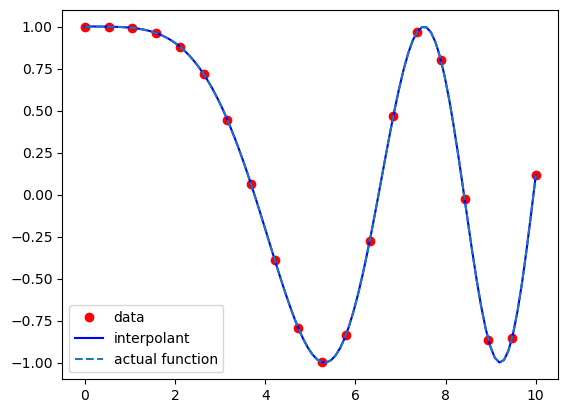

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as ln


def VanderMatrix(xs):
    Np1 = xs.shape[0]
    V=np.ones((Np1,Np1))

    for i in range(Np1):
        for j in range(1,Np1):
            V[i,j]=V[i,j-1]*xs[i]
    
    return V

# also need afunction for evaluating the interpolant
# our vandermonde matrix is organized differently than 
# np.vander (in our V matrix the powers of x are increasing from left to right instead of decreasing like in the np.vander),
# so we need to evaluate the interpolant in different way

def MonoPolyEval(a_coeff, xx):
    
    Np1 = a_coeff.shape[0]

    p = 1
    q = a_coeff[0]

    for j in range(1,Np1):
        p = p*xx
        q = q + a_coeff[j]*p
    
    return q


# do the interpolation problem

# data points
stpt = 0
endpt = 10
NumIterPts = 20

x = np.linspace(stpt,endpt,NumIterPts, endpoint = True)
y = np.cos(-x**2/9.0)


# now build interpolation linear system and solve
V = VanderMatrix(x)
a_coeff = ln.solve(V,y)

# now evaluate the interpolant
xx = np.linspace(stpt,endpt,num=100, endpoint = True)
yy = MonoPolyEval(a_coeff,xx)

yy2 = np.cos(-xx**2/9.0)

plt.plot(x,y,'ro',xx,yy,'-b',xx,yy2,'--')
plt.legend(['data','interpolant','actual function'])
plt.show()
